# Definições


In [1]:
import numpy as np

np.random.seed(42)
trials = 10000


def investimento_inicial():
    return np.random.normal(1000, 10)


def fluxo_anual(ano):
    # Custos anuais
    custos = np.random.normal(10, 5)

    # Faturamento anual
    faturamento = np.random.normal(100 * (1 + ano / 10), 10)

    return faturamento - custos


anos_de_operação = 20
valor_residual = 100
taxa_de_desconto = 0.1


# Simulação


In [2]:
def calcular_fluxos_caixa():
    return [-investimento_inicial()] + [fluxo_anual(i) for i in range(anos_de_operação)]


simulações_fluxos = [calcular_fluxos_caixa() for _ in range(trials)]
fluxos_media = np.mean(simulações_fluxos, axis=0)


# Métricas


## Retorno sobre Investimento (ROI)


Em média, o ROI do projeto é 280.08%


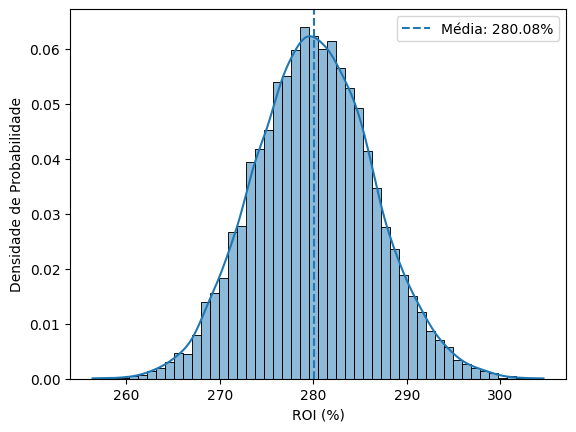

In [3]:
from plots import plot_density


def calcular_roi(fluxos_caixa):
    investimento = -fluxos_caixa[0]
    retorno = np.sum(fluxos_caixa) + valor_residual

    return (retorno / investimento) * 100


roi_values = [calcular_roi(simulações_fluxos[i]) for i in range(trials)]
print(f"Em média, o ROI do projeto é {np.mean(roi_values):.2f}%")

plot_density(roi_values, "ROI", "%")


## Valor Presente Líquido (VPL)


Em média, o VPL do projeto é R$420.34


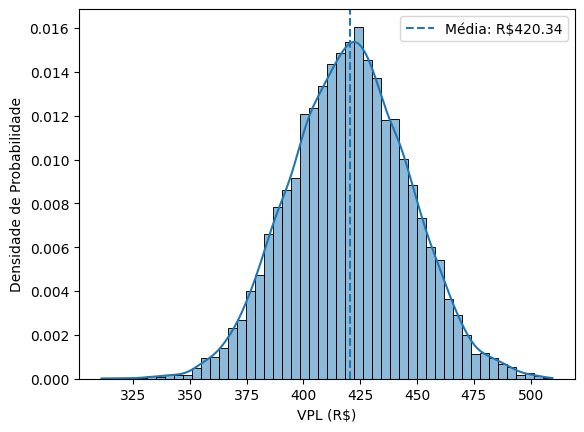

In [4]:
def calcular_vpl(taxa_desconto, fluxos_caixa):
    vpl = 0
    for t, fc in enumerate(fluxos_caixa):
        vpl += fc / (1 + taxa_desconto) ** t
    return vpl + valor_residual


vpl_values = [
    calcular_vpl(taxa_de_desconto, simulações_fluxos[i]) for i in range(trials)
]


print(f"Em média, o VPL do projeto é R${np.mean(vpl_values):.2f}")
plot_density(vpl_values, "VPL", "R$", True)


## TIR (Taxa Interna de Retorno)


In [5]:
from scipy.optimize import root

tir = root(calcular_vpl, x0=0.1, args=(fluxos_media,)).x[0]

print(
    f"Considerando o fluxo de caixa sendo a média de todas as simulações, o TIR do projeto é {tir*100:.2f}%"
)
print(
    f"Com essa taxa de desconto, o valor do VPL é: R${calcular_vpl(tir, fluxos_media):.2f}"
)


Considerando o fluxo de caixa sendo a média de todas as simulações, o TIR do projeto é 14.99%
Com essa taxa de desconto, o valor do VPL é: R$-0.00


## Payback


Em média, o payback do projeto é 13.97 anos


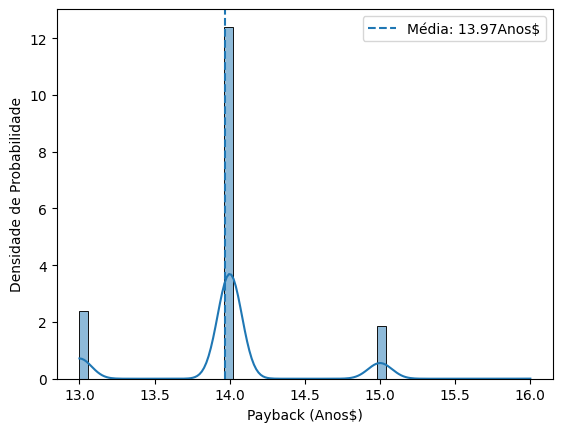

In [6]:
def calcular_payback(taxa_desconto, fluxos_caixa):
    vpl = 0
    for t, fc in enumerate(fluxos_caixa):
        vpl += fc / (1 + taxa_desconto) ** t
        if vpl >= 0:
            return t

    print("Projeto sem payback")
    return -1


payback_values = [
    calcular_payback(taxa_de_desconto, simulações_fluxos[i]) for i in range(trials)
]

print(f"Em média, o payback do projeto é {np.mean(payback_values):.2f} anos")
plot_density(payback_values, "Payback", "Anos$")
